# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


1.Видно, что формат некоторых значений некоректен, так например стобец is_apartment определенно должен иметь bool формат, так же как и studio и open_plan, поскольку показывает является ли обявление об апартаментах или нет.
2.first_day_exposition определенно должен именть формат даты.
3.Так же присутсвует колонка с заглавными буквами cityCenters_nearest.
4.Некоторые форматы тоже можно изменить, например floors_total, balcony, days_exposition могу иметь только целостное значение формата int, а не float потому что врятли может быть 5.4 этажа, или же 1.5 балкона.

In [5]:
data.duplicated().sum()

0

Очевидные дупликаты в дата фрейме отсутствуют.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

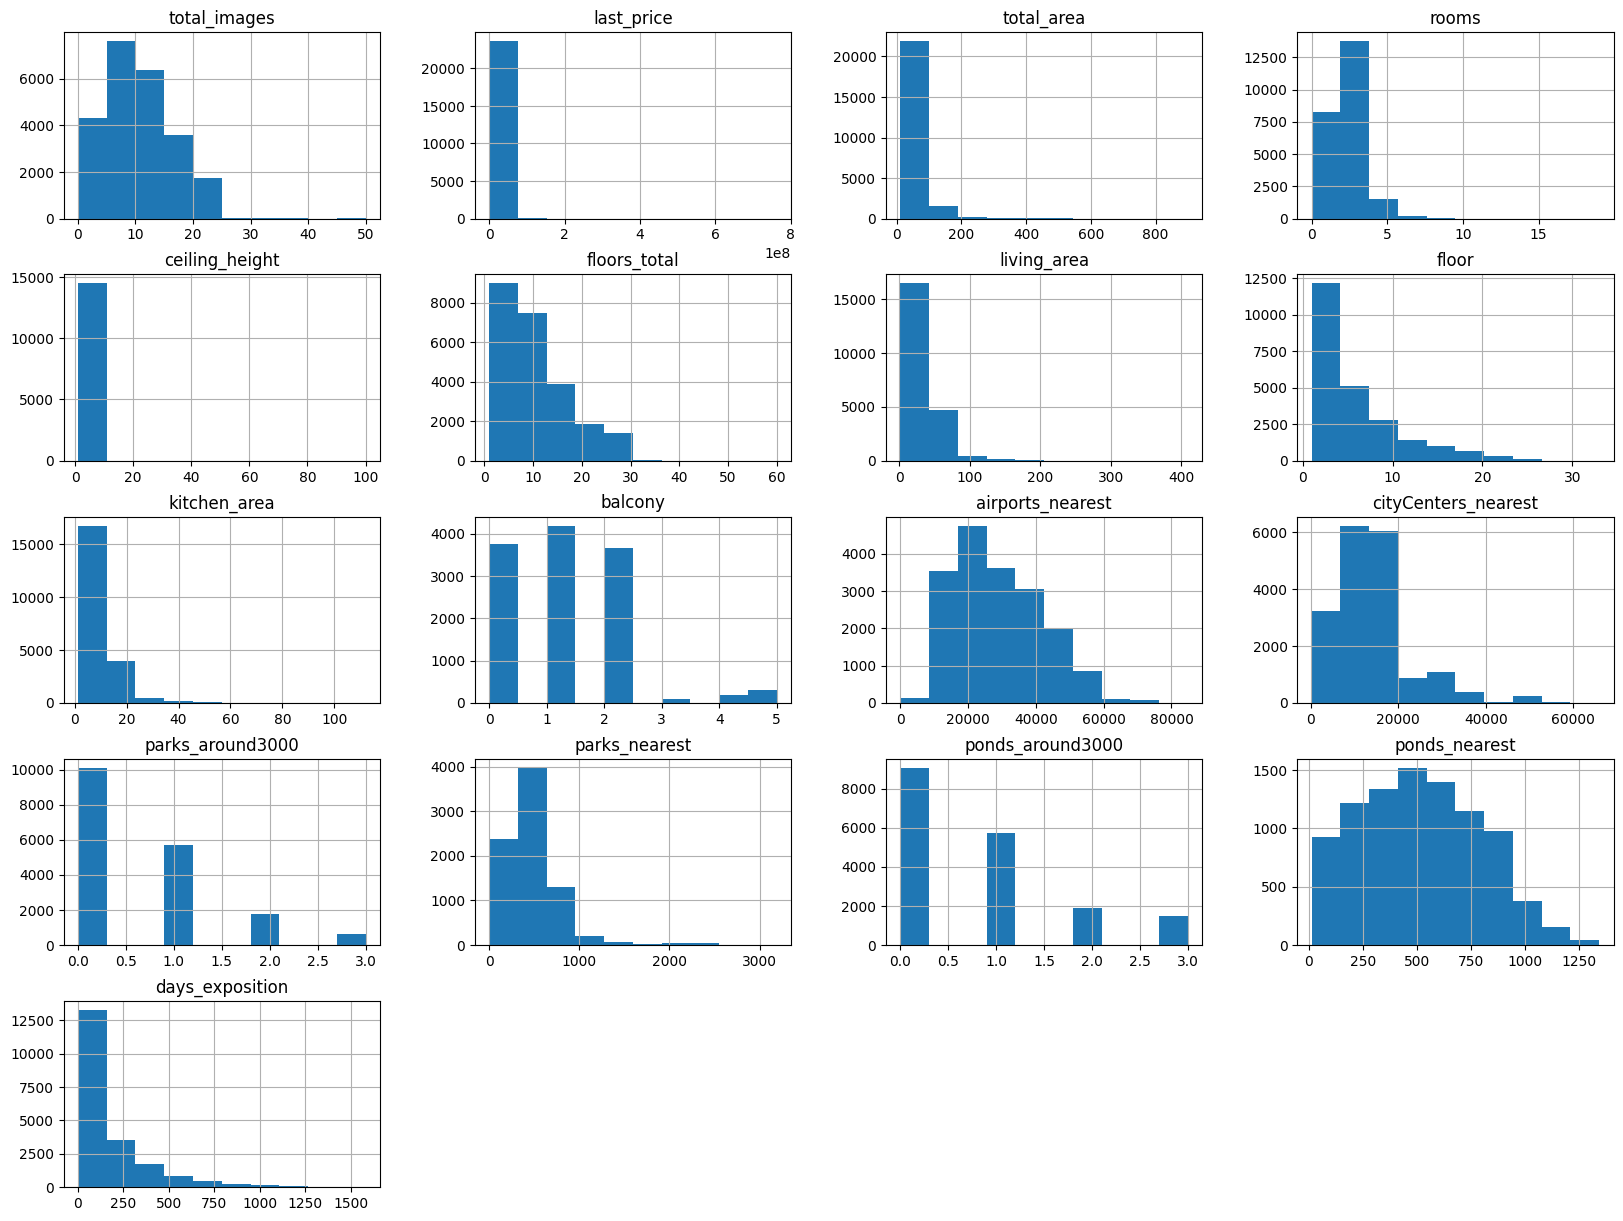

In [7]:
data.hist(figsize=(20, 15));

## Выполните предобработку данных

### Из очевидного можно сразу привести названия колонко к виду snake_case, а так же привести даты в правильный формат.

In [8]:
data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace = True) #привел названия колонок к нижнему регистру

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format ='%Y-%m-%dT%H:%M:%S')# Замена формата object на datetime

In [10]:
data['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23699, dtype: float64

In [11]:
data['last_price']=data['last_price'].astype('int') #замена цены на формат целого числа int, так как в стоимости квартир числа целые, и не видно цифр после запятой.

### В колонке по высоте потолков есть пропуски, заменим пропуски на медианные значения.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #замена высоты потолков по медианне
data['ceiling_height'].isna().sum() 

0

In [13]:
data['ceiling_height'].unique() #Есть значение больше 20, скорее всего ошибка в постановке запятой.

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [14]:
data.loc[data['ceiling_height'] >=20,'ceiling_height'] = data['ceiling_height']/10 # Пересчет высоких значений высоты потолков
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())
print(data['ceiling_height'].isna().sum()) #Заменили высоту потолков и привели к нормальным значение, видим отсутсвие пропусков.

1.0
14.0
0


In [15]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

### В колонке floors_total(Всего этажей), есть пропуски.
Из за этого мы не сможем узнать на первом или последнем этаже находится жилье, либо это вообще одноэтажное строение. Однако этих пропусков всего 86 можно заменить данные значения на медианные.

In [16]:
def floors_total(row):
    if row['floors_total'] >= 0:
        return 0
    else:
        return data[data['floor'] == row['floor']]['floors_total'].median()
        
data['d'] = data.apply(floors_total, axis=1) 
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = (data['d'] + data['floors_total']).astype('int')
data.drop('d', axis= 1 , inplace= True )
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

### В колонке living_area проверим кореляцию c другими параметрами объявления.
Если есть зависимость то можно вставить медианные значения, если же нет то оставим как есть.

In [17]:
print(data.corr().sort_values(by='living_area', ascending=False)['living_area'].head())# видим зависимость размера жилой зоны, от общей площади.

living_area     1.000000
total_area      0.939537
rooms           0.845977
last_price      0.566492
kitchen_area    0.428674
Name: living_area, dtype: float64


In [18]:
f = (data['living_area']/data['total_area']).median()
print(f)

0.5678598992678503


In [19]:
data['living_area'] = data['living_area'].fillna(f*data['total_area']).round(2)
    

In [20]:
data['living_area'].isna().sum() # Видим отсутствие пропусков.

0

### В колонке с описанием апартаменты ли это, очень много пропусков, проверим среднее значение апартаментов от общего числа.

In [21]:
data['is_apartment'].mean() #Среднее значение очень маленькое, видимо пропуски вызваны тем, что собственник не указал, что это не аппартаменты, можем заменить значения на False

0.018018018018018018

In [22]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data['is_apartment'].isna().sum() # Пропусков нет

0

### Проверим зависимость размера кухни от общей площади.

In [23]:
print(data.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head()) #зависимость есть, но не такая большая, что бы проставлять медианные значения, оставлю пока так.

kitchen_area      1.000000
total_area        0.609121
last_price        0.519869
living_area       0.436096
ceiling_height    0.299071
Name: kitchen_area, dtype: float64


### Сделаем тоже самое с балконами.

In [24]:
print(data.corr().sort_values(by='balcony', ascending=False)['balcony'].head())  #зависимостей почти нет, возможно собственники просто не указали отсутсвие отдельной кухни.

balcony         1.000000
floors_total    0.192026
floor           0.168773
total_images    0.121693
kitchen_area    0.098634
Name: balcony, dtype: float64


In [25]:
data['balcony'].fillna(0).astype('int') # Заменил пропуски на 0, и поменял значение Float на int, так как пол балконы быть не может.

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int32

### Изучим наименования населенных пунктов, и заменим пропуски.

In [26]:
data['locality_name'] = data['locality_name'].fillna('unknow')# заменим неизвестные названия на 'unknown'
set(data['locality_name'].unique())

{'unknow',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское'

В названиях очень много лишних наименаваний которые затрудняют прочтение, уберем такие словосочетания как 'поселок городского типа', 'городской посёлок', а так же слова типа 'деревня', 'Пансионат', и т.п.

In [27]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].replace(['городской поселок ','деревня ','коттеджный поселок ','поселок ',
                                                       'городского типа ','поселок станции ','поселок ',
                                                       'садоводческое некоммерческое товарищество ','садовое товарищество ',
                                                      'село ','при железнодорожной станции ','станции '], '',regex=True
                                                     )

In [28]:
set(data['locality_name'].unique())


{'unknow',
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичево',
 'имени мор

### Пропуски в колонках airports_nearest, cityсenters_nearest, parks_nearest, ponds_nearest:
1. Данные заполненны автоматически на основе геоданных, поэтому подставлять медианны безсмысленно.
2. Если данные отсутсвуют это может означать не совпадение с условиями автоматической проверки, например в населеном пункте нету аэропорта, или населеных пункт очень далеко от центра крупного города.
3. Считаю что если поменять данные данные на средние или медианные произойдет смещение на графиках по оценке недвижимости, и снизит точность исследования.


### Пропуски в колонках ponds_around3000, parks_around3000
Скорее всего указывают что в пределах 3000 м прудов или парков нет, можно заменить на 0

In [29]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [30]:
print(data['ponds_around3000'].isna().sum())
print(data['parks_around3000'].isna().sum())

0
0


# Выводы по разделу:

В данном разделе Изменили формат нескольких столбцов на подобающий, изменили названия населеных пунктов для исключения не очевидных дупликатов, заполнили медианными значениями некоторые пропуски в данных, а так же пропуски которые не несут смысловую нагрузки в виде названия населленных пунктов.

## Добавьте в таблицу новые столбцы

In [31]:
data['price_per_m2'] = (data['last_price']/data['total_area']).round(2) #Добавляем столбец со стоимостью 1 кв.м. жилья

In [32]:
data['day_publication'] = data['first_day_exposition'].dt.weekday #добавляем столбец с днем недели публикации объявления

In [33]:
data['month_publication'] = data['first_day_exposition'].dt.month #добавляем столбец с месяцем  публикации объявления

In [34]:
data['year_publication'] = data['first_day_exposition'].dt.year #добавляем столбец с годом  публикации объявления

In [35]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else: 
        return 'другой'
data['type_apartment_floor'] = data.apply(floor, axis=1)#добавляем стобец с указанием первого или последнего этижа
data['type_apartment_floor'].unique() 
    

array(['другой', 'первый', 'последний'], dtype=object)

In [36]:
data['distance_to_the_center'] = (data['city_centers_nearest']/1000).round(0) # добавили столбец с расстоянием до центра города в км.
data['distance_to_the_center'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

## Проведите исследовательский анализ данных

### Начнем анализ с общей площади

In [37]:
data['total_area'].describe() 

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Видим что медиана находится около 60, а максимальное зачение 900, оно выбивается из диаграммы размаха, поэтому можем оставить значения от менимального 12 и до 100, что будь чуть больше чем Q3.

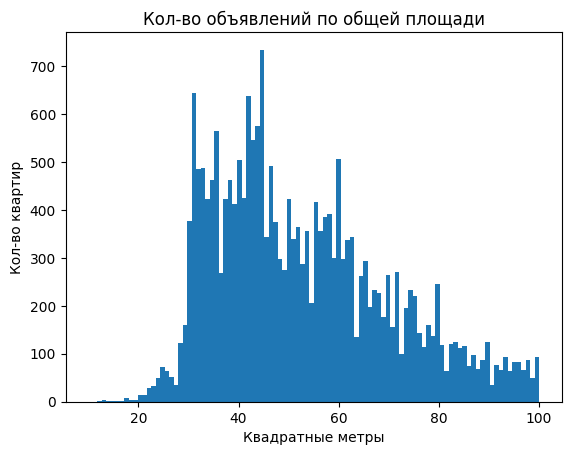

In [38]:
plt.hist(data['total_area'], bins=100, range=(10,100))
plt.title('Кол-во объявлений по общей площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир')
plt.show()
         

По гисторамме видно, что основное кол-во квартир по площади от 40 до 60

### Проведем анализ по жилой площади

In [39]:
data['living_area'].describe()

count    23699.000000
mean        34.578225
std         22.340666
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Видно что медиана находится около 34, максимальное значение 409.7, а минимальное 2, для построение гистограммы можно использовать значения от 15 до 45 что будет чуть меньше и чуть больше Q1 и Q3

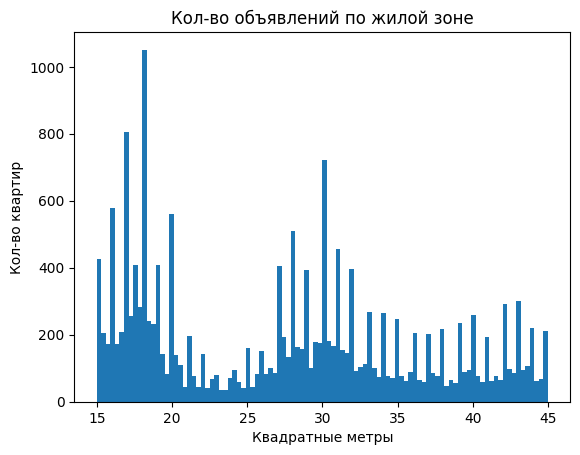

In [40]:
plt.hist(data['living_area'], bins=100, range=(15,45))
plt.title('Кол-во объявлений по жилой зоне')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир')
plt.show()
         

По гисторамме видны два пика по предложениям, на 17,5 и 30 кв.м жилой площади.

### Проведем анализ по площади кухни

In [41]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Видно что медианна находится около 10, мин и макс значения равны 1.3 и 112 соответсвенно, для построения гистограммы можно использовать значения от 5 до 15 что бы значения были чуть меньше и больше Q1 b Q3 соотвественно.

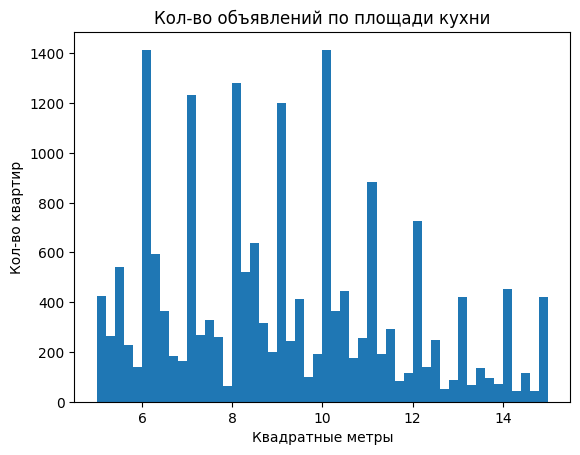

In [42]:
plt.hist(data['kitchen_area'], bins=50, range=(5,15))
plt.title('Кол-во объявлений по площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир')
plt.show()

По гистограмме видно, что пиковые значения идут на целых числах, самое большое количество предложений с кухнями 6-10 метров квадратных, далее предложение снижаются.

### Проведем анализ по цене объекта

In [43]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [44]:
pd.set_option("display.max_rows", None)
print(f"Минимальное значение цены {data['last_price'].min()} рублей")
print(f"Максимальное значение цены {data['last_price'].max()} рублей")

Минимальное значение цены 12190 рублей
Максимальное значение цены 763000000 рублей


мин и макс значения равны 12 тыс и 763 млн соответсвенно, для построения гистограммы можно использовать значения от минимального до 9.000000e+06 что бы были видны значение входящие в Q1,Q2,Q3 и отсечь очень дорогие объекты.

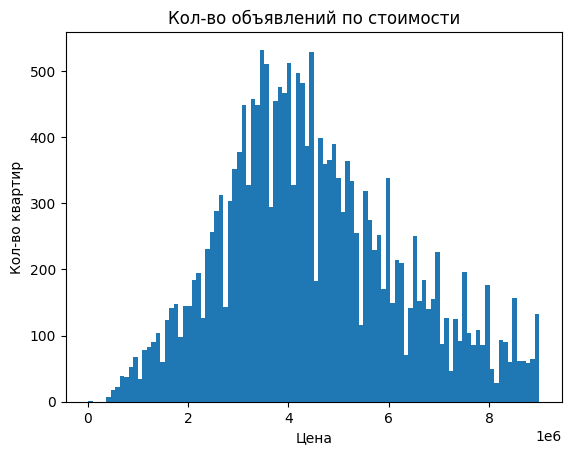

In [45]:
plt.hist(data['last_price'], bins=100, range=(1.219000e+04,9.000000e+06))
plt.title('Кол-во объявлений по стоимости')
plt.xlabel('Цена')
plt.ylabel('Кол-во квартир')
plt.show()

По гистограмме видно что средняя цена объекта от 2.6 млн до 4.2

### Проведем анализ по кол-ву комнат

In [46]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Видим что минимально значение равно 0, а максимально 19, медианное значение около 2, для построения гистограммы возьмем минимальное значение, и 7.

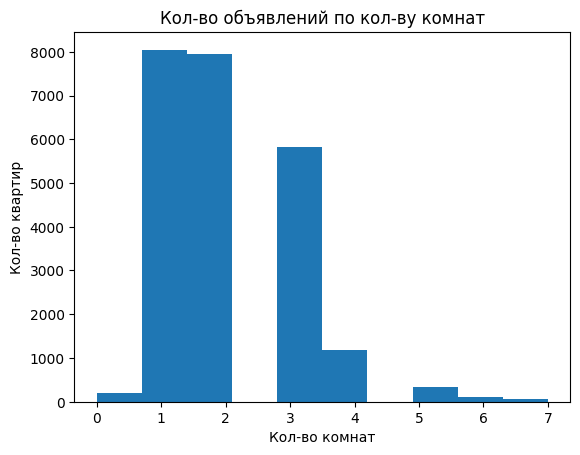

In [47]:
plt.hist(data['rooms'], bins=10, range=(0,7))
plt.title('Кол-во объявлений по кол-ву комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во квартир')
plt.show()

Как мы видим самые болшьшие предложения на рынке это одна и двух-комнатные квартиры, 3-х комнатных квартир чуть меньше.

### Проведем анализ по высоте потолков

In [48]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Есть большие значения которые можно отсечь, построем гистограмму от 2 до 3.

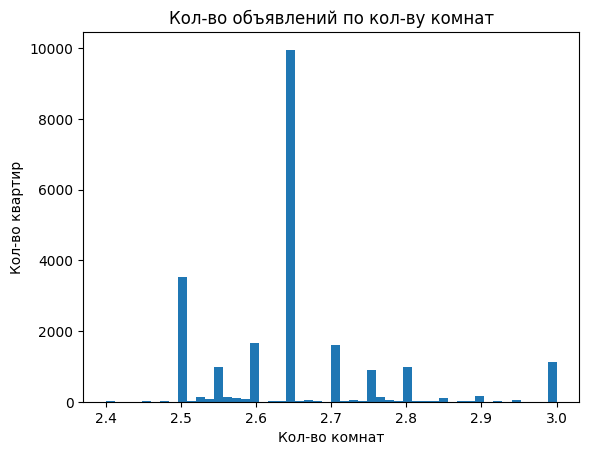

In [49]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=50, range=(2.4,3))
plt.title('Кол-во объявлений по кол-ву комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во квартир')
plt.show()

По гистограмме видно, что больше всего предложений с потолками 2.65м.

### Проведем анализ по этажу

In [50]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

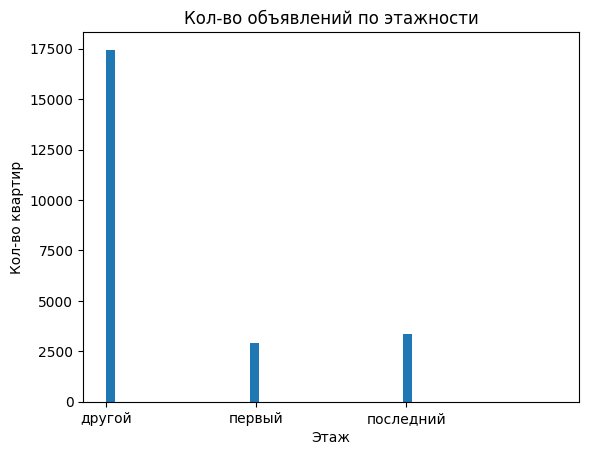

In [51]:
plt.hist(data['type_apartment_floor'], bins=50, range=(0,3))
plt.title('Кол-во объявлений по этажности')
plt.xlabel('Этаж')
plt.ylabel('Кол-во квартир')
plt.show()

Как видим большинство предложений не на первом и не на последнем этаже, однако на последнем этаже предложений чуть больше.

### Проведем анализ по общему кол-ву этажей в доме.

In [52]:
data['floors_total'].describe()

count    23699.000000
mean        10.681759
std          6.599383
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Видим что мин значение 1 и максимальное 60. Построем гистограмму от мин значения до 25 что бы охватить все квартили

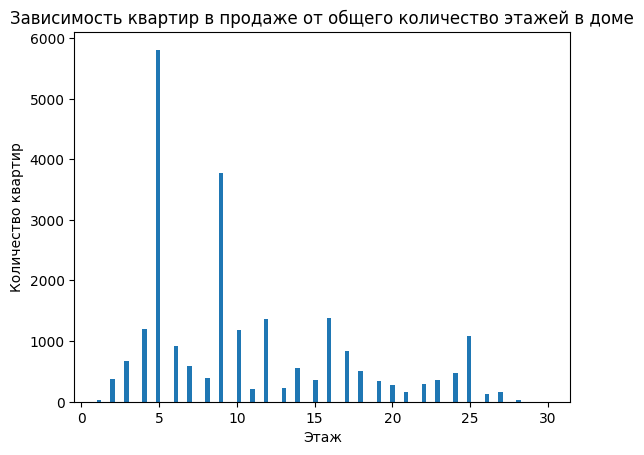

In [53]:
plt.hist(data['floors_total'], bins=100, range=(1,30))
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

По гистограмме видим, что большинство квартир продается в 5 этажных зданиях, дальше идут 9 этажные, далее предложения снижаются.

### Проведем анализ по расстоянию до центра города.

In [54]:
data['distance_to_the_center'].describe()

count    18180.000000
mean        14.184818
std          8.616194
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: distance_to_the_center, dtype: float64

Построим гистограмму по минимальному значению и 40, для обхвата квартилей

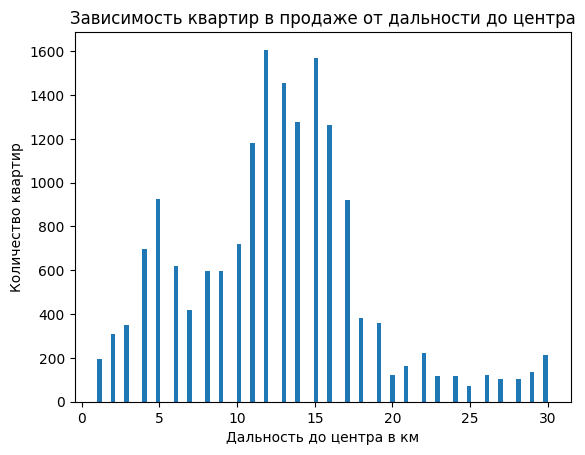

In [55]:
plt.hist(data['distance_to_the_center'], bins=100, range=(1,30))
plt.title('Зависимость квартир в продаже от дальности до центра')
plt.xlabel('Дальность до центра в км')
plt.ylabel('Количество квартир')
plt.show()

Большинство предложений находятся на расстоянпии от 11 до 16 км до центра города.

### Проведем анализ предложений относительно дальности от ближайшего парка

In [56]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Построем гистограмму минимальному и 1000, дабы обхватить все квартили

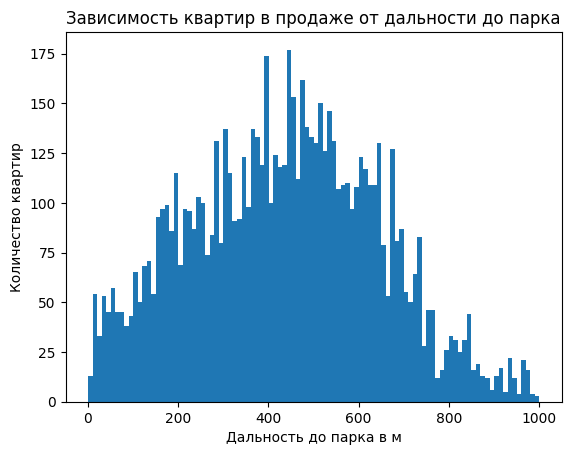

In [57]:
plt.hist(data['parks_nearest'], bins=100, range=(1,1000))
plt.title('Зависимость квартир в продаже от дальности до парка')
plt.xlabel('Дальность до парка в м')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме видно что большинство предложений находятся на расстоянии от 400 до 550 м от парка.

# Выводы по разделу:


1.Основное кол-во квартир по общей площади от 40 до 60, а по жилой 17,5м2 и 30м2 
2.Самое большое количество предложений с кухнями 6-10 метров квадратных, далее предложение снижаются.
3.Средняя цена объекта от 2.6 млн до 4.2
4.Самые болшьшие предложения на рынке это одна и двух-комнатные квартиры, 3-х комнатных квартир чуть меньше.
5.Больше всего предложений с потолками 2.65м.
6.Большинство квартир продается в 5 этажных зданиях.
7.Большинство предложений находятся на расстоянии от 11 до 16 км до центра города.
8.Объемное кол-во предложений находятся на расстоянии от 400 до 550 м от парка.

## Изучим как быстро проадвались квартиры

In [58]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим что в среднем объявленрие снималось через 180 дней после публикации, при этом медианное значение 95, самое короткое объявление было 1 день, самое длинное 1580 дней. Постоим гистограмму

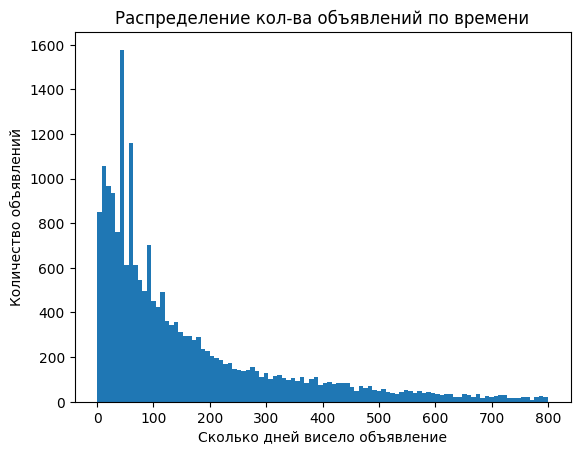

In [59]:
plt.hist(data['days_exposition'], bins=100, range=(0,800))
plt.title('Распределение кол-ва объявлений по времени')
plt.xlabel('Сколько дней висело объявление')
plt.ylabel('Количество объявлений')
plt.show()

# Вывод по разделу:
По гистограмме видно, большое кол-во объявлений о продаже закрываются в первые 100 дней. Быстрыми продажами можно считать те которые находятся в 1 квартиле то есть до 45(Q1) дней, долгими же продажами можно считать те которые висят больше 232 дней(Q3)

## Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

'month_publication','year_publication','day_publication','type_apartment_floor'

In [62]:
data.pivot_table(index='floor',values=['last_price','total_area','living_area','kitchen_area','rooms','ceiling_height'
                                             ]).corr()


,ceiling_height,kitchen_area,last_price,living_area,rooms,total_area
ceiling_height,1.000000,-0.308041,0.131833,0.011836,-0.081097,-0.032471
kitchen_area,-0.308041,1.000000,0.361686,0.085582,0.094420,0.411305
last_price,0.131833,0.361686,1.000000,0.626493,0.442449,0.738972
living_area,0.011836,0.085582,0.626493,1.000000,0.898888,0.920157
rooms,-0.081097,0.094420,0.442449,0.898888,1.000000,0.811538
total_area,-0.032471,0.411305,0.738972,0.920157,0.811538,1.000000


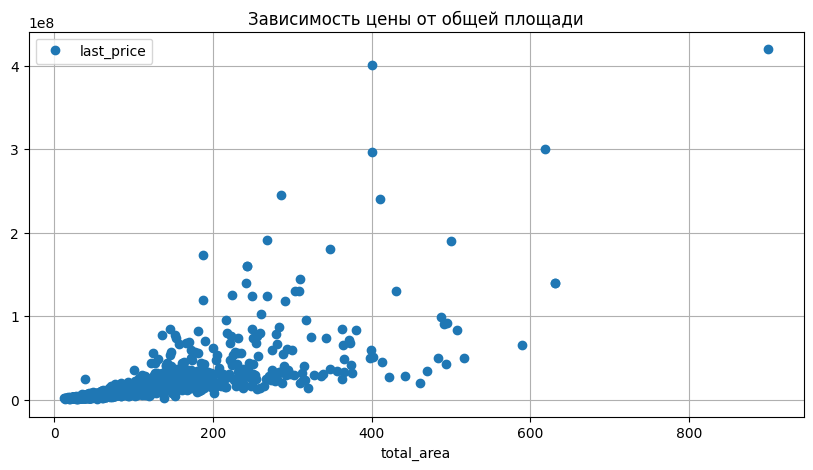

In [63]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
)
plt.title('Зависимость цены от общей площади')
plt.show()

На гистограмме видны большое кол-во выбросов, устраним их.

In [64]:
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dfq = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height' ]
for col in list_features:
    data[col] = quartile_range(data, col)

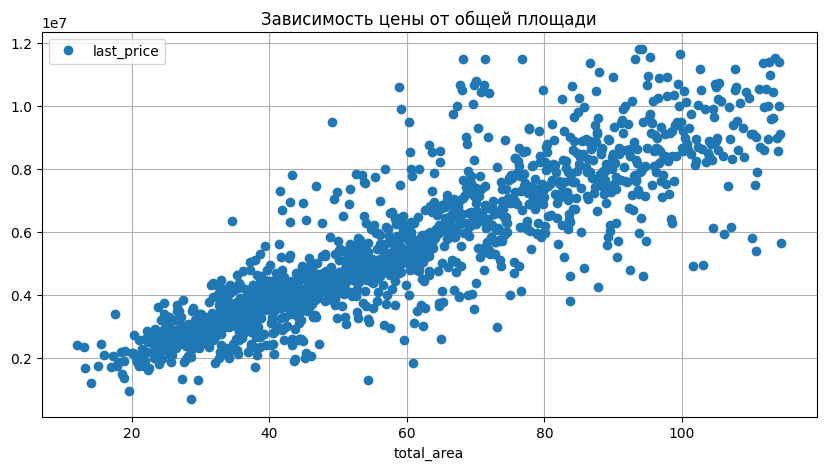

In [65]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
)
plt.title('Зависимость цены от общей площади')
plt.show()

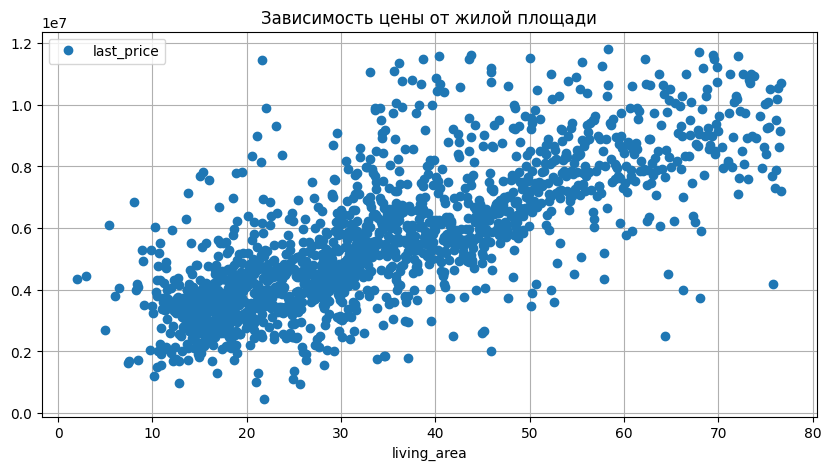

In [66]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

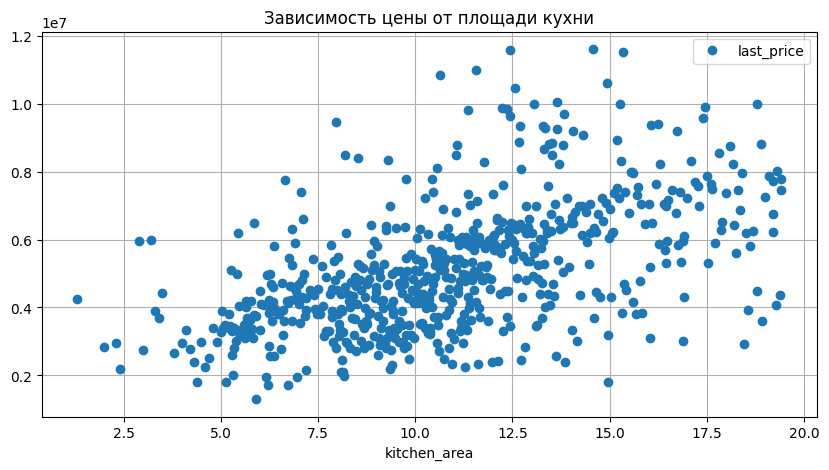

In [67]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

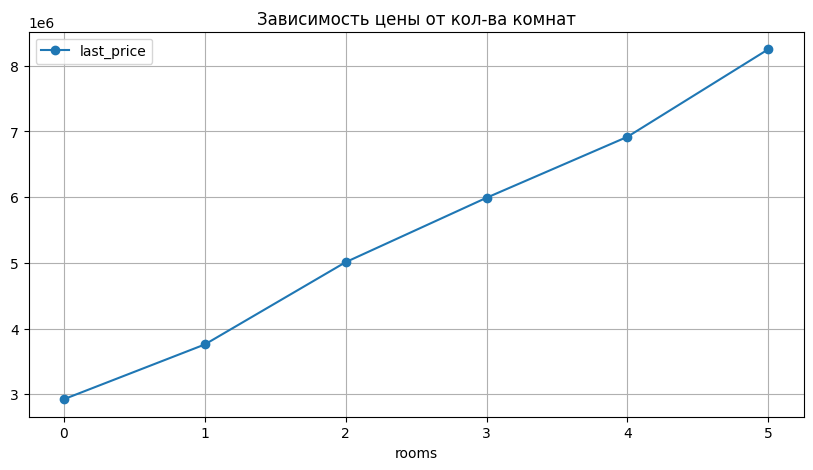

In [68]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.title('Зависимость цены от кол-ва комнат')
plt.show()

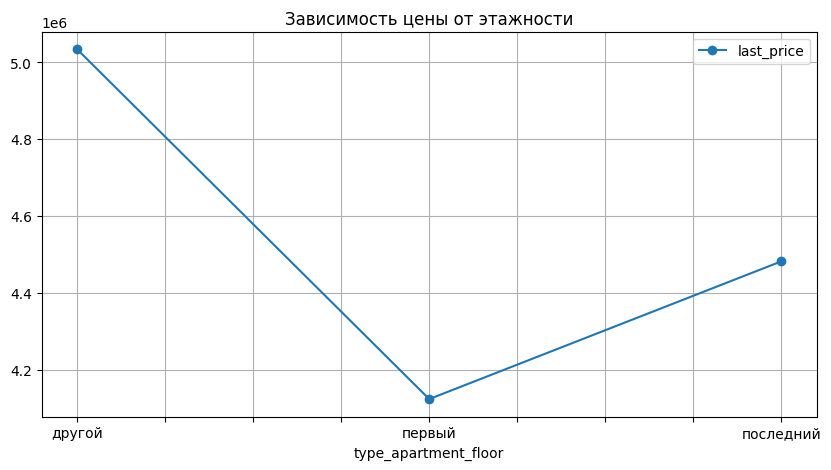

In [69]:
(
    data.pivot_table(index='type_apartment_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.title('Зависимость цены от этажности')
plt.show()

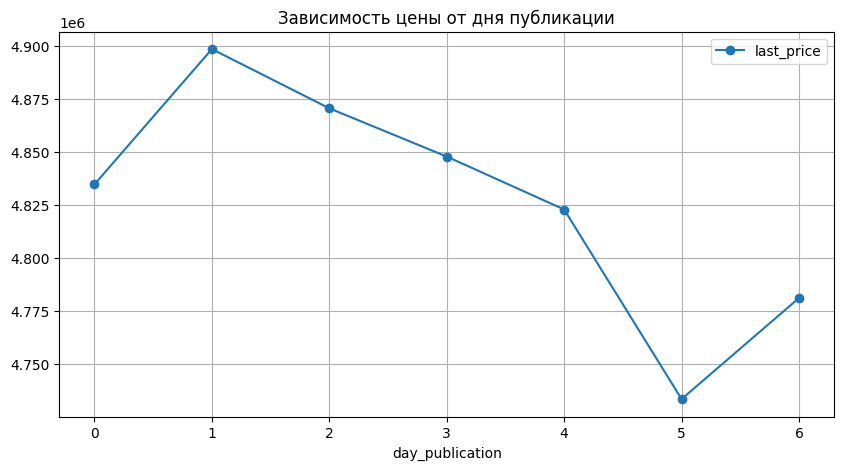

In [70]:
(
    data.pivot_table(index='day_publication',values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

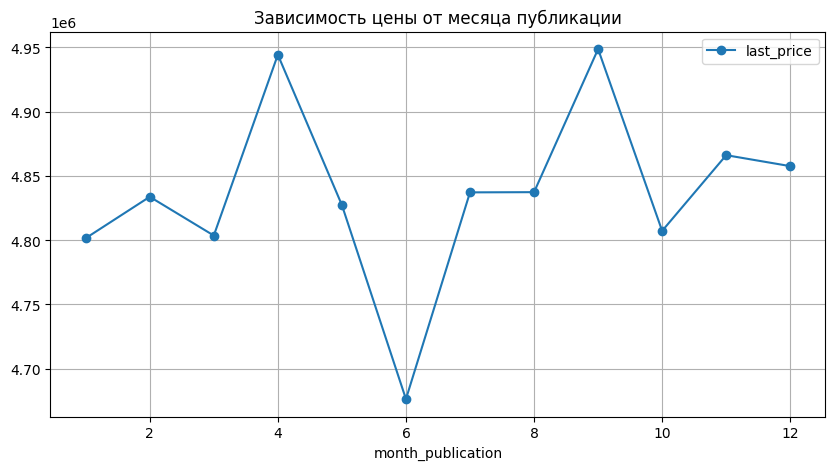

In [71]:
(
    data.pivot_table(index='month_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

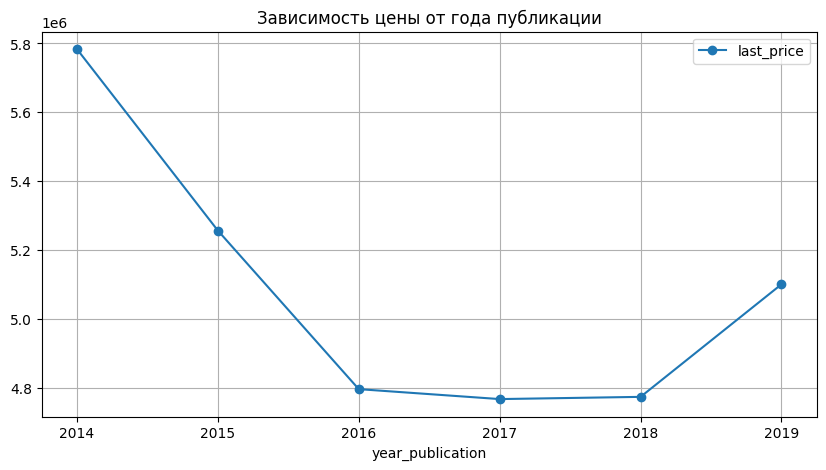

In [72]:
(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

# Выводы по разделу:
1.Чем больше площадь,жилая площадь, и кол-во комнат, тем больше цена.\
2.Чем больше площадь кухни тем цена выше, но зависимоть не такая большая.

3.На первом этаже квартиры дешевле всего.
4.Обявления о продаже в субботу самые низкие, а в среду самые дороги
5.В июне цены в объявлениях выставляют ниже всего, а в апреле самые дорогие.
6.С 2014 по 2017 заметен спад в цене недвижемости, а с 2018 года цены опять начали расти.

## Посчитаему среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [73]:
number_of_offers = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])

In [74]:
print(number_of_offers)

                             count
                        last_price
locality_name                     
unknow                          43
агалатово                        4
александровская                  1
алексеевка                       1
аннино                          16
аро                              3
барышево                         2
батово                           9
бегуницы                        17
белогорка                       11
белоостров                       1
бокситогорск                    16
большая вруда                    4
большая ижора                   17
большая пустомержа               1
большие колпаны                 16
большое рейзино                  1
большой сабск                    1
бор                              1
борисова грива                   1
бугры                          114
будогощь                         4
ваганово                         3
важины                           6
вартемяги                       20
вахнова кара        

In [75]:
number_of_offers.columns = ['count']

In [76]:
number_of_offers = number_of_offers.sort_values(by='count', ascending=False).head(10)

In [77]:
number_of_offers['price_per_m2'] = data.pivot_table(index='locality_name', values='price_per_m2').round(2)

In [78]:
number_of_offers.sort_values(by='price_per_m2', ascending=False)

,count,price_per_m2
locality_name,,
санкт-петербург,13737,114849.01
пушкин,338,103125.82
кудрово,470,95324.93
парголово,327,90175.91
мурино,590,86087.51
шушары,440,78677.36
колпино,336,75424.58
гатчина,305,68746.15
всеволожск,397,68654.47


# Выводы по разделу:
1. Самая дорогая цена за кв м в Санкт Петербурге.
2. Так же больше половины всех объявлений приходится на Санкт Петербург, 13737 из 23699.

In [79]:
number_of_offers = number_of_offers.reset_index()

In [80]:
number_of_offers = number_of_offers.sort_values(by='price_per_m2', ascending=False)

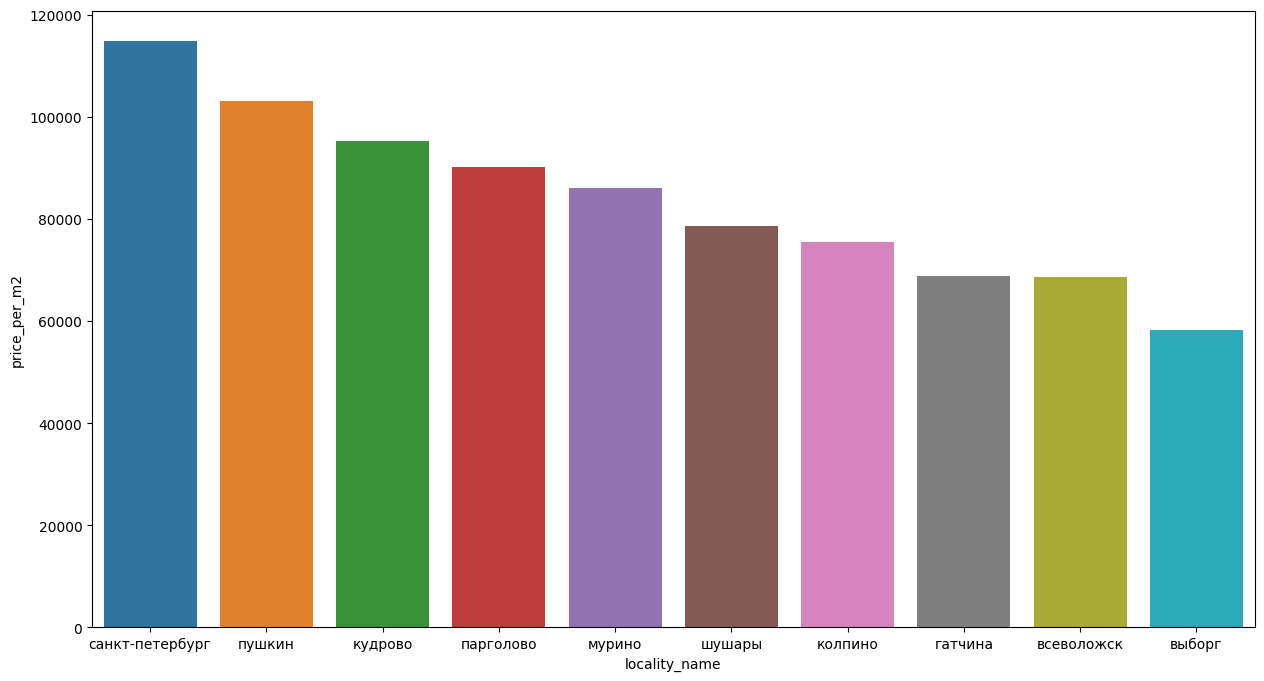

In [81]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=number_of_offers['locality_name'], y=number_of_offers['price_per_m2'], data=number_of_offers);

## Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра

In [82]:
data.query('locality_name == "санкт-петербург"')['distance_to_the_center'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_to_the_center, dtype: float64

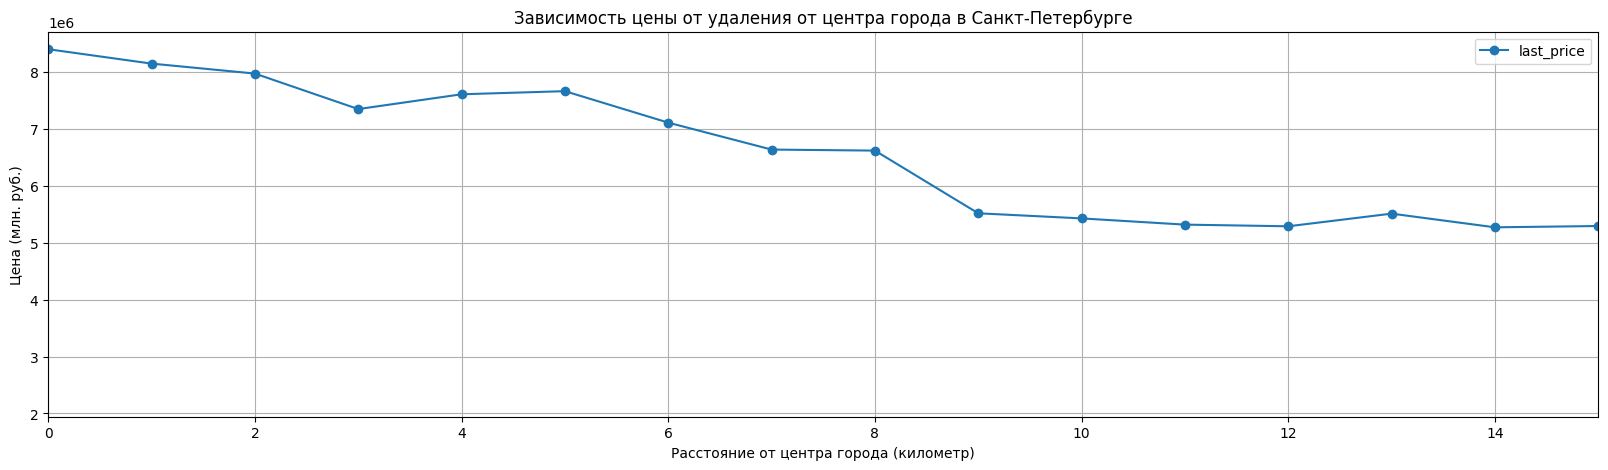

In [83]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_to_the_center', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(20, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()

По гистограмме видно, что чем дальше от центра, тем дешевле цена квартиры. А так же что после 8 км, ценны становятся в боковик, что означает отсутствие влияния после этой границы.

# Напишите общий вывод

В процессе работы можно сделать следующие выводы.\
1. В процессе работы были выявлены пропуски, причиной которых может быть как человеческий фактор так и ошибки в компьютерном заполнении. Часть пропусков была заполнены по смысловым возможностям, часть пропущена для сохранения смысла информации.\
2. В таблицы присутствовали не очевидные дубликаты в названиях населенных пунктов, которые были устранены посредством замены и удаления не нужных по смыслу слов.\
3. Добавлены новые колонки('distance_to_the_center' 'year_publication' 'month_publication' 'day_publication' 'price_per_m2') для оценки зависимости цены от даты, и для отслеживания зависимости цены за кв.м. от расстояния до центра Санкт-Петербурга.\
4. Проведенно исследование различных зависимостей итоговой цены объекта, от различных фактором в виде размера кухни, кол-ва комнат, кол-ва жилой площади и т.п. на основании которых можно сделать вывод, что цена недвижимости зависит от общей площади, жилой площади, и не сильно зависит от площади кухни.\
5.Так же выяснил, что цена недвижимости на первом этажа обычно дешевле, чем цена недвижимости на последнем и других этаж.\
6.Изучил как быстро продаются квартиры, и выяснили что объявления в среднем снимаются через 180 дней, а так же что в течении первого года большая часть объявлений снимается. В целом можно сказать что быстрыми по реалезации считается недвижимость которая реализуется не более чем за 45 дней, а медленными по реалезации выступает недвижемость со сроком объявлений более 232\
7.Поститанна средняя цена 1 кв.м в 10 населленых пунстах с самы большим кол-вом объявлений, при этом больше половины выборки занимают объявления из Санкт_Петербурга - 13737 объявлений.
8.В самом Санкт Петербурге ценна на недвижимость зависит от удаленности от центра города, но с 8 км от центра, ценны идут в боковике, что означает что зависимость распросраняется только на квартиры находящиеся в пределах 8 км от центра.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.